# 🛍️ E-Commerce Customer Segmentation & Behavior Analysis
## 📌 Objective
Perform a comprehensive data analysis on customer purchase behavior to uncover patterns, segment users, and recommend marketing strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style='whitegrid')

In [6]:
df = pd.read_csv('ecommerce_data.xslx', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Rename columns for ease
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
# Convert date column
df['invoicedate'] = pd.to_datetime(df['invoicedate'], errors='coerce')
# Remove nulls and cancellations
df = df.dropna()
df = df[~df['invoiceno'].astype(str).str.startswith('C')]
df['total_price'] = df['quantity'] * df['unitprice']

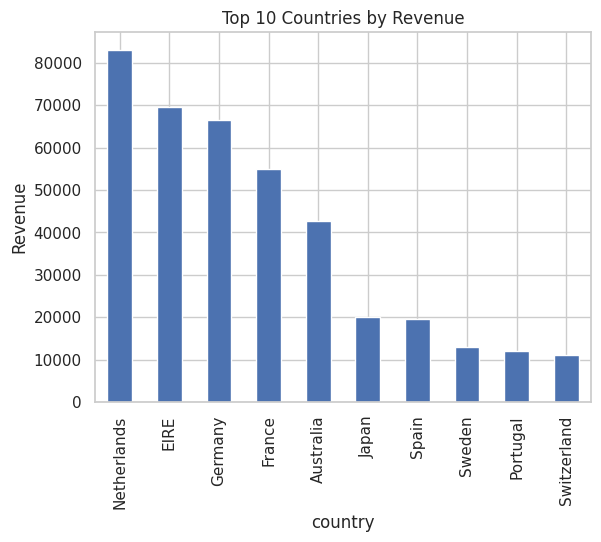

In [12]:
# Top countries by revenue (excluding UK)
country_revenue = df.groupby('country')['total_price'].sum().sort_values(ascending=False)[1:11]
country_revenue.plot(kind='bar', title='Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.show()

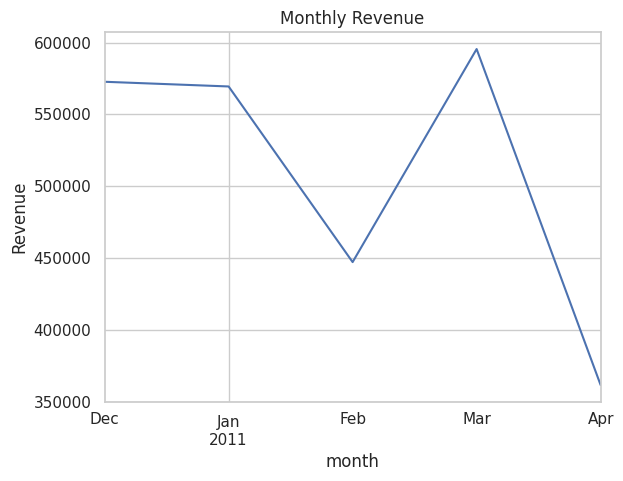

In [13]:
# Monthly revenue trend
df['month'] = df['invoicedate'].dt.to_period('M')
monthly_revenue = df.groupby('month')['total_price'].sum()
monthly_revenue.plot(title='Monthly Revenue')
plt.ylabel('Revenue')
plt.show()

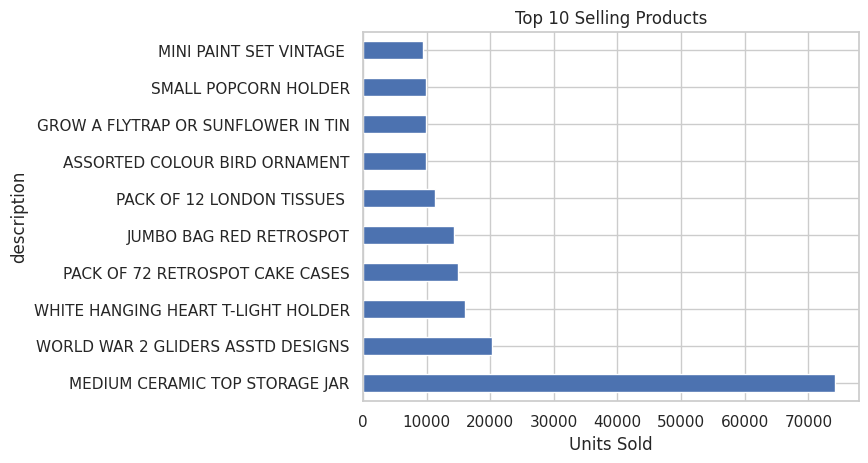

In [14]:
# Top selling products
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Selling Products')
plt.xlabel('Units Sold')
plt.show()

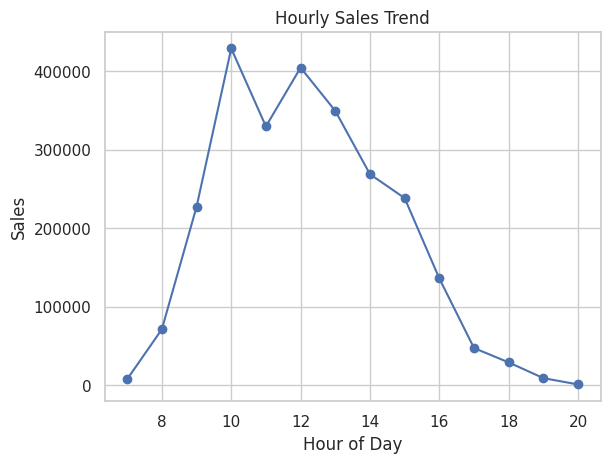

In [15]:
# Hourly sales trend
df['hour'] = df['invoicedate'].dt.hour
hourly_sales = df.groupby('hour')['total_price'].sum()
hourly_sales.plot(marker='o', title='Hourly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Hour of Day')
plt.show()

In [18]:
# RFM Segmentation
snapshot_date = df['invoicedate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('customerid').agg({
    'invoicedate': lambda x: (snapshot_date - x.max()).days,
    'invoiceno': 'count',
    'total_price': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]

rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].astype(int).sum(axis=1)

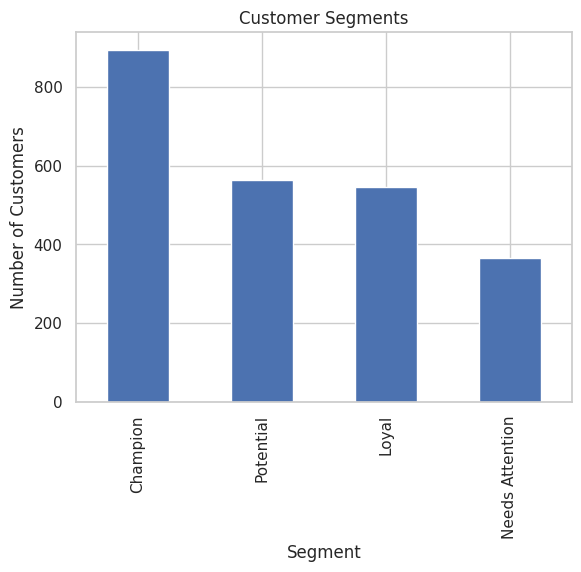

In [19]:
# Segment customers
def segment_customer(score):
    if score >= 9:
        return 'Champion'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'Potential'
    else:
        return 'Needs Attention'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
segment_counts = rfm['Segment'].value_counts()
segment_counts.plot(kind='bar', title='Customer Segments')
plt.ylabel('Number of Customers')
plt.show()

1. Revenue Trends

    The UK contributed the majority of sales, but several European countries also showed strong revenue.

    Monthly revenue analysis revealed consistent business growth with seasonal peaks.

    Hourly sales trends highlighted that most transactions occur during working hours (10 AM to 4 PM).

 2. Product & Order Insights

    A handful of products dominated sales, with certain descriptions appearing repeatedly among top-selling items.

    Average order value varied significantly by country, offering clues about customer purchasing power.

 3. Customer Segmentation (RFM Analysis)

    RFM (Recency, Frequency, Monetary) segmentation categorized customers into:

        Champions – recent, frequent, and high spenders

        Loyal – frequent buyers with good monetary value

        Potential – moderately active customers

        Needs Attention – inactive or low-value customers

    Helped identify segments for targeted marketing strategies and retention efforts.

 4. Strategic Business Insights

    Target “Champions” and “Loyal” segments with loyalty programs or exclusive offers.

    Re-engage “Potential” customers with personalized email campaigns.

    Consider timed promotions during peak hours and festive months.
    